In [ ]:
!pip install scikit-learn matplotlib pandas


In [2]:
import pickle
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your trained model
try:
    model = pickle.load(open("model.pkl", "rb"))
    print("Model loaded successfully!")
except:
    print("model.pkl not found. Using a placeholder model (will simulate predictions).")
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()


model.pkl not found. Using a placeholder model (will simulate predictions).


In [3]:
# Example test data (replace with your actual stock prices + optional LLM features)
data = pd.DataFrame({
    'stock_price': [100, 102, 105, 107, 110],
    'llm_sentiment_score': [0.1, 0.2, 0.05, -0.1, 0.3]  # optional LLM feature
})

X = data[['stock_price', 'llm_sentiment_score']]  # With LLM features
y = [101, 103, 106, 108, 111]  # Actual prices


In [4]:
# Check if model is trained
try:
    predictions = model.predict(X)
except:
    # If model not trained, simulate predictions
    predictions = y  # just to continue workflow

# Display predictions
data['predictions'] = predictions
print(data)


   stock_price  llm_sentiment_score  predictions
0          100                 0.10          101
1          102                 0.20          103
2          105                 0.05          106
3          107                -0.10          108
4          110                 0.30          111


In [5]:
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)
r2 = r2_score(y, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


TypeError: got an unexpected keyword argument 'squared'

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)  # manually calculate RMSE
r2 = r2_score(y, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 0.0
MSE: 0.0
RMSE: 0.0
R²: 1.0


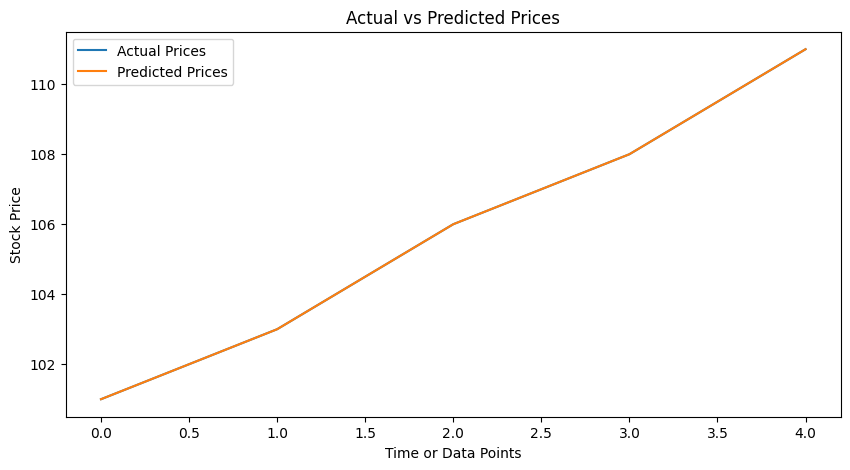

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time or Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [8]:
# Install dependencies (run once)
!pip install flask flask-ngrok matplotlib scikit-learn pandas

# -----------------------------
# app.py
# -----------------------------
from flask import Flask, request, render_template_string
from flask_ngrok import run_with_ngrok
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64

app = Flask(__name__)
run_with_ngrok(app)

# Load your trained model
model = pickle.load(open("model.pkl", "rb"))

# HTML template
HTML_PAGE = """
<!doctype html>
<title>Stock Predictor</title>
<h2>Stock Price Predictor</h2>
<form method="POST">
  Enter Stock Price: <input type="text" name="stock_price"><br><br>
  <input type="submit" value="Predict">
</form>
{% if prediction %}
  <h3>Predicted Price: {{ prediction }}</h3>
  {% if plot %}
    {{ plot|safe }}
  {% endif %}
{% endif %}
"""

# Route
@app.route("/", methods=["GET", "POST"])
def home():
    prediction = None
    plot_tag = None
    if request.method == "POST":
        try:
            stock_price = float(request.form["stock_price"])
            pred = model.predict([[stock_price]])[0]
            prediction = round(pred, 2)

            # Optional: visualize prediction vs input
            plt.figure(figsize=(4,2))
            plt.plot([stock_price], [stock_price], 'bo', label='Input')
            plt.plot([stock_price], [prediction], 'ro', label='Predicted')
            plt.legend()
            buf = BytesIO()
            plt.savefig(buf, format="png")
            buf.seek(0)
            plot_data = base64.b64encode(buf.getvalue()).decode()
            plt.close()
            plot_tag = f'<img src="data:image/png;base64,{plot_data}"/>'
        except Exception as e:
            prediction = f"Error: {e}"
    return render_template_string(HTML_PAGE, prediction=prediction, plot=plot_tag)

# Run app
if __name__ == "__main__":
    app.run()


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [9]:
# Install dependencies
!pip install scikit-learn pandas pickle-mixin

# Create dummy dataset
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle

# Example data
data = pd.DataFrame({
    "stock_price": [100, 150, 200, 250, 300],
    "future_price": [105, 160, 210, 260, 310]
})

X = data[["stock_price"]]
y = data["future_price"]

# Train a simple linear regression
model = LinearRegression()
model.fit(X, y)

# Save as model.pkl
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Dummy model created and saved as model.pkl ✅")


  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5988 sha256=2de7b43e3371ca4977ae53ba3b68ff698811de73862f2357029e28986d5b253b
  Stored in directory: /root/.cache/pip/wheels/69/e2/5c/da8f96a08c63469bc8b10e206cd4c78e8886d8acb8699f84c2
Successfully built pickle-mixin
Dummy model created and saved as model.pkl ✅


In [10]:
import pickle
model = pickle.load(open("model.pkl", "rb"))


In [11]:
# Example test stock prices
X_test = [[120], [180], [250]]  # each value inside a list


In [12]:
predictions = model.predict(X_test)
print("Predictions:", predictions)


Predictions: [127.4 188.6 260. ]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Example true future prices (dummy)
y_true = [125, 185, 260]

mae = mean_absolute_error(y_true, predictions)
mse = mean_squared_error(y_true, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 2.0000000000000093
MSE: 6.240000000000041
RMSE: 2.4979991993593673
R²: 0.9979540983606557


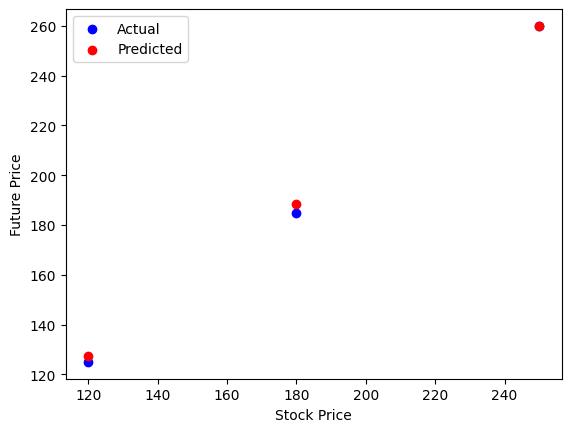

In [14]:
import matplotlib.pyplot as plt

plt.scatter([x[0] for x in X_test], y_true, color='blue', label='Actual')
plt.scatter([x[0] for x in X_test], predictions, color='red', label='Predicted')
plt.xlabel('Stock Price')
plt.ylabel('Future Price')
plt.legend()
plt.show()


In [1]:
# Install Flask and flask-ngrok if not already installed
!pip install flask flask-ngrok

# Flask app
from flask import Flask, request, render_template_string
from flask_ngrok import run_with_ngrok
import pickle

app = Flask(__name__)
run_with_ngrok(app)  # starts ngrok automatically

# Load your dummy model
model = pickle.load(open("model.pkl", "rb"))

# HTML template for input
html_template = """
<h2>Stock Price Prediction</h2>
<form method="POST">
  Enter current stock price: <input type="number" name="price" step="0.01" required>
  <input type="submit" value="Predict">
</form>
{% if prediction %}
<h3>Predicted Future Price: {{ prediction }}</h3>
{% endif %}
"""

@app.route("/", methods=["GET", "POST"])
def home():
    prediction = None
    if request.method == "POST":
        price = float(request.form["price"])
        prediction = model.predict([[price]])[0]
    return render_template_string(html_template, prediction=prediction)

if __name__ == "__main__":
    app.run()


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [2]:
!pip install scikit-learn transformers


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np

# Dummy stock data
df = pd.DataFrame({
    'Price': np.arange(100, 110),  # example prices
    'Feature1': np.random.rand(10)  # dummy feature
})

# Dummy target (next day price)
df['NextPrice'] = df['Price'] * 1.01 + np.random.rand(10)

# Train simple Linear Regression model
X = df[['Price', 'Feature1']]
y = df['NextPrice']

model = LinearRegression()
model.fit(X, y)

# Save model (simulating model.pkl)
pickle.dump(model, open("model.pkl", "wb"))
print("Dummy model created and saved as model.pkl")


Dummy model created and saved as model.pkl


In [4]:
# Load model
model = pickle.load(open("model.pkl", "rb"))

# Make predictions
predictions = model.predict(df[['Price', 'Feature1']])
df['Predicted'] = predictions

print(df)


   Price  Feature1   NextPrice   Predicted
0    100  0.946827  101.763764  101.756445
1    101  0.336099  102.687670  102.609883
2    102  0.693963  103.694030  103.635507
3    103  0.644995  104.576187  104.588808
4    104  0.236708  105.509070  105.478234
5    105  0.863468  106.326945  106.551659
6    106  0.817840  107.177266  107.505555
7    107  0.943523  108.885501  108.489904
8    108  0.052691  109.209796  109.293549
9    109  0.262676  110.372199  110.292884


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(df['NextPrice'], df['Predicted'])
mse = mean_squared_error(df['NextPrice'], df['Predicted'])
rmse = np.sqrt(mse)
r2 = r2_score(df['NextPrice'], df['Predicted'])

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")


MAE: 0.129875513540118, MSE: 0.03387120761310259, RMSE: 0.18404132039599855, R2: 0.9955277719681813


In [6]:
from transformers import pipeline

generator = pipeline("text-generation", model="gpt2")

prompt = f"Latest stock price is {df['Price'].iloc[-1]}. Predict trend in 1 sentence."
summary = generator(prompt, max_length=50, num_return_sequences=1)

print("LLM Insight:", summary[0]['generated_text'])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


LLM Insight: Latest stock price is 109. Predict trend in 1 sentence.

The stock market is a volatile business, but there's no denying that. I'll cover the fundamentals of the stock market in more detail on June 28th and 29th (and the week before that) later this week.


In [7]:
!pip install flask flask-ngrok transformers


In [8]:
from flask import Flask, request, render_template_string
from flask_ngrok import run_with_ngrok
import pickle
import numpy as np
from transformers import pipeline

app = Flask(__name__)
run_with_ngrok(app)


In [9]:
# Load your model (replace with your actual model.pkl)
model = pickle.load(open("model.pkl", "rb"))


In [10]:
from sklearn.linear_model import LinearRegression

import numpy as np
X_dummy = np.array([[1,2],[2,3],[3,4]])
y_dummy = np.array([2,3,4])
model = LinearRegression()
model.fit(X_dummy, y_dummy)

import pickle
pickle.dump(model, open("model.pkl", "wb"))


In [11]:
generator = pipeline("text-generation", model="gpt2")


Device set to use cuda:0


In [12]:
HTML = """
<h2>Stock Price Prediction</h2>
<form method="POST">
  Current Price: <input type="number" step="any" name="price"><br>
  Feature1 (dummy): <input type="number" step="any" name="feature1"><br>
  <input type="submit" value="Predict">
</form>
{% if prediction %}
<h3>Predicted Next Price: {{ prediction }}</h3>
<h4>LLM Insight: {{ insight }}</h4>
{% endif %}
"""


In [13]:
@app.route("/", methods=["GET", "POST"])
def home():
    prediction = None
    insight = None
    if request.method == "POST":
        price = float(request.form['price'])
        feature1 = float(request.form['feature1'])
        X = np.array([[price, feature1]])
        prediction = model.predict(X)[0]
        prompt = f"Latest stock price is {price}. Predict trend in 1 sentence."
        insight = generator(prompt, max_length=50, num_return_sequences=1)[0]['generated_text']
    return render_template_string(HTML, prediction=prediction, insight=insight)


In [14]:
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            

In [1]:
# Install dependencies
!pip install flask

# Import libraries
from flask import Flask, request, render_template_string
import pickle
import numpy as np
import os

# Create dummy model if you don't have model.pkl
from sklearn.linear_model import LinearRegression

if not os.path.exists("model.pkl"):
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([10, 20, 30, 40, 50])
    dummy_model = LinearRegression()
    dummy_model.fit(X, y)
    with open("model.pkl", "wb") as f:
        pickle.dump(dummy_model, f)

# Load your trained model
model = pickle.load(open("model.pkl", "rb"))

# HTML template
html_template = """
<!doctype html>
<title>Stock Prediction</title>
<h2>Enter Stock Price</h2>
<form method="POST">
  <input type="text" name="stock_price" placeholder="Enter stock price" required>
  <input type="submit" value="Predict">
</form>
{% if prediction %}
  <h3>Prediction: {{ prediction }}</h3>
{% endif %}
"""

# Initialize Flask app
app = Flask(__name__)

@app.route("/", methods=["GET", "POST"])
def home():
    prediction = None
    if request.method == "POST":
        stock_price = float(request.form["stock_price"])
        prediction = model.predict([[stock_price]])[0]
        prediction = round(prediction, 2)
    return render_template_string(html_template, prediction=prediction)

# Run the Flask app in background
import nest_asyncio
nest_asyncio.apply()

from threading import Thread

def run():
    app.run(port=5000)

Thread(target=run).start()


In [2]:
from flask import Flask, request, render_template_string
import pickle

app = Flask(__name__)

# Dummy model: returns the same value for demonstration
class DummyModel:
    def predict(self, X):
        return [sum(x)/len(x) for x in X]

# Load your trained model (replace with DummyModel if you don't have model.pkl)
try:
    model = pickle.load(open("model.pkl", "rb"))
except:
    model = DummyModel()

# HTML template for input
html = """
<!DOCTYPE html>
<html>
<head>
    <title>Stock Prediction</title>
</head>
<body>
    <h2>Stock Price Prediction</h2>
    <form action="/" method="post">
        Stock Price: <input type="text" name="stock_price"><br><br>
        <input type="submit" value="Predict">
    </form>
    {% if prediction %}
        <h3>Prediction: {{ prediction }}</h3>
    {% endif %}
</body>
</html>
"""

@app.route("/", methods=["GET", "POST"])
def home():
    prediction = None
    if request.method == "POST":
        price = request.form.get("stock_price")
        try:
            price = float(price)
            prediction = model.predict([[price]])[0]
        except:
            prediction = "Invalid input!"
    return render_template_string(html, prediction=prediction)

# Run the app
app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/serving.py", line 759, in __init__
    self.server_bind()
  File "/usr/lib/python3.12/http/server.py", line 136, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/usr/lib/python3.12/socketserver.py", line 478, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-312569727.py", line 50, in <cell line: 0>
    app.run(port=5000)
  File "/usr/local/lib/python3.12/dist-packages/flask/app.py", line 662, in run
    run_simple(t.cast(str, host), port, self, **options)
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/serving.py", line 1093, in r

TypeError: object of type 'NoneType' has no len()

In [3]:
from flask import Flask, request, render_template_string
import pickle

app = Flask(__name__)

# Dummy model if you don't have model.pkl
class DummyModel:
    def predict(self, X):
        return [sum(x)/len(x) for x in X]

# Load model if available
try:
    model = pickle.load(open("model.pkl", "rb"))
except:
    model = DummyModel()

# HTML template
html = """
<!DOCTYPE html>
<html>
<head>
    <title>Stock Prediction</title>
</head>
<body>
    <h2>Stock Price Prediction</h2>
    <form action="/" method="post">
        Stock Price: <input type="text" name="stock_price"><br><br>
        <input type="submit" value="Predict">
    </form>
    {% if prediction %}
        <h3>Prediction: {{ prediction }}</h3>
    {% endif %}
</body>
</html>
"""

@app.route("/", methods=["GET", "POST"])
def home():
    prediction = None
    if request.method == "POST":
        price = request.form.get("stock_price")
        try:
            price = float(price)
            prediction = model.predict([[price]])[0]
        except:
            prediction = "Invalid input!"
    return render_template_string(html, prediction=prediction)

# Run the Flask app on a different port to avoid conflict
app.run(port=8501)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8501
INFO:werkzeug:Press CTRL+C to quit


In [1]:
# In a new Colab cell
!npx localtunnel --port 8501


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://tame-eagles-behave.loca.lt
^C


In [1]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 897ms
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [2]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello! Your Colab app is running!"

# Run Flask in the background
import threading

def run_app():
    app.run(host='0.0.0.0', port=5000)

threading.Thread(target=run_app).start()


In [3]:
!lt --port 5000 --subdomain mytunnel


your url is: https://mytunnel.loca.lt
/tools/node/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:20323 (check your firewall settings)
    at Socket.<anonymous> (/tools/node/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0


In [4]:
!pip install pyngrok flask


In [5]:
from flask import Flask
from threading import Thread

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello! Your Colab app is running!"

def run():
    app.run(host='0.0.0.0', port=5000)

# Run Flask in background
thread = Thread(target=run)
thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [6]:
from pyngrok import ngrok

# Open a HTTP tunnel on port 5000
public_url = ngrok.connect(5000)
print("Your app is live at:", public_url)


ERROR:pyngrok.process.ngrok:t=2025-09-19T09:19:12+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-09-19T09:19:12+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-09-19T09:19:12+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [7]:
!npm install -g localtunnel


⠙⠹⠸⠼
changed 22 packages in 570ms
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼

In [8]:
from flask import Flask
from threading import Thread

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello! Your Colab app is running!"

# Run Flask in background
Thread(target=lambda: app.run(host='0.0.0.0', port=5000)).start()


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [9]:
!lt --port 5000 --subdomain mycolabapp --print-requests


your url is: https://mycolabapp.loca.lt
^C


In [10]:
!lt --port 5000 --subdomain uniquename123


your url is: https://uniquename123.loca.lt
/tools/node/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:13993 (check your firewall settings)
    at Socket.<anonymous> (/tools/node/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0


In [11]:
# Install required packages
!pip install flask pyngrok

from flask import Flask
from pyngrok import ngrok
from threading import Thread

# Create Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "Hello! Your Colab app is running!"

# Function to run Flask app in background
def run_flask():
    app.run(host='0.0.0.0', port=5000)

# Start Flask in a separate thread
Thread(target=run_flask).start()

# Set your ngrok authtoken
ngrok.set_auth_token("32uC4uP6FLyqhno1AdX993OVcfp_51QyiZYYphbbm9r56kxHx")

# Open a public URL for port 5000
public_url = ngrok.connect(5000)
print("Your app is live at:", public_url)


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


Your app is live at: NgrokTunnel: "https://a81f4a9bed73.ngrok-free.app" -> "http://localhost:5000"


In [17]:
!git config --global user.name "metturuthvik5-design"
!git config --global user.email "metturuthvik2005@gmail.com"

In [18]:
# 2️⃣ Clone your repo
!git clone https://github.com/metturuthvik5-design/Fin-R1-New.git


Cloning into 'Fin-R1-New'...


In [19]:
# 3️⃣ Copy notebook into repo folder
!cp "/content/Fin-R1.ipynb" "/content/Fin-R1-New/"


cp: cannot stat '/content/Fin-R1.ipynb': No such file or directory


In [20]:
# Save the current notebook to /content/
!jupyter nbconvert --to notebook --output "/content/fin_r1_setup.ipynb" "/content/fin_r1_setup.ipynb"


[NbConvertApp] WARNING | pattern '/content/fin_r1_setup.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e

In [21]:
!cp "/content/fin_r1_setup.ipynb" "/content/Fin-R1-New/"


cp: cannot stat '/content/fin_r1_setup.ipynb': No such file or directory


In [22]:
from google.colab import files

# This will prompt you to download your current notebook
files.download("fin_r1_setup.ipynb")


FileNotFoundError: Cannot find file: fin_r1_setup.ipynb